<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Evaluating Classification Models on Humor Styles Data

_Authors: Kiefer Katovich (SF)_

---

In this lab you will be practicing evaluating classification models (Logistic Regression in particular) on a "Humor Styles" survey.

This survey is designed to evaluate what "style" of humor subjects have. Your goal will be to classify gender using the responses on the survey.

## Humor styles questions encoding reference

### 32 questions:

Subjects answered **32** different questions outlined below:

    1. I usually don't laugh or joke with other people.
    2. If I feel depressed, I can cheer myself up with humor.
    3. If someone makes a mistake, I will tease them about it.
    4. I let people laugh at me or make fun of me at my expense more than I should.
    5. I don't have to work very hard to make other people laugh. I am a naturally humorous person.
    6. Even when I'm alone, I am often amused by the absurdities of life.
    7. People are never offended or hurt by my sense of humor.
    8. I will often get carried away in putting myself down if it makes family or friends laugh.
    9. I rarely make other people laugh by telling funny stories about myself.
    10. If I am feeling upset or unhappy I usually try to think of something funny about the situation to make myself feel better.
    11. When telling jokes or saying funny things, I am usually not concerned about how other people are taking it.
    12. I often try to make people like or accept me more by saying something funny about my own weaknesses, blunders, or faults.
    13. I laugh and joke a lot with my closest friends.
    14. My humorous outlook on life keeps me from getting overly upset or depressed about things.
    15. I do not like it when people use humor as a way of criticizing or putting someone down.
    16. I don't often say funny things to put myself down.
    17. I usually don't like to tell jokes or amuse people.
    18. If I'm by myself and I'm feeling unhappy, I make an effort to think of something funny to cheer myself up.
    19. Sometimes I think of something that is so funny that I can't stop myself from saying it, even if it is not appropriate for the situation.
    20. I often go overboard in putting myself down when I am making jokes or trying to be funny.
    21. I enjoy making people laugh.
    22. If I am feeling sad or upset, I usually lose my sense of humor.
    23. I never participate in laughing at others even if all my friends are doing it.
    24. When I am with friends or family, I often seem to be the one that other people make fun of or joke about.
    25. I donít often joke around with my friends.
    26. It is my experience that thinking about some amusing aspect of a situation is often a very effective way of coping with problems.
    27. If I don't like someone, I often use humor or teasing to put them down.
    28. If I am having problems or feeling unhappy, I often cover it up by joking around, so that even my closest friends don't know how I really feel.
    29. I usually can't think of witty things to say when I'm with other people.
    30. I don't need to be with other people to feel amused. I can usually find things to laugh about even when I'm by myself.
    31. Even if something is really funny to me, I will not laugh or joke about it if someone will be offended.
    32. Letting others laugh at me is my way of keeping my friends and family in good spirits.

---

### Response scale:

For each question, there are 5 possible response codes ("likert scale") that correspond to different answers. There is also a code that indicates there is no response for that subject.

    1 == "Never or very rarely true"
    2 == "Rarely true"
    3 == "Sometimes true"
    4 == "Often true"
    5 == "Very often or always true
    [-1 == Did not select an answer]
    
---

### Demographics:

    age: entered as as text then parsed to an interger.
    gender: chosen from drop down list (1=male, 2=female, 3=other, 0=declined)
    accuracy: How accurate they thought their answers were on a scale from 0 to 100, answers were entered as text and parsed to an integer. They were instructed to enter a 0 if they did not want to be included in research.	

In [219]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

### 1. Load the data and perform any EDA and cleaning you think is necessary.

It is worth reading over the description of the data columns above for this.

In [220]:
hsq = pd.read_csv('./datasets/hsq_data.csv')

In [221]:
hsq.shape

(1071, 39)

In [222]:
hsq.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy
0,2,2,3,1,4,5,4,3,4,3,...,4,2,2,4.0,3.5,3.0,2.3,25,2,100
1,2,3,2,2,4,4,4,3,4,3,...,4,3,1,3.3,3.5,3.3,2.4,44,2,90
2,3,4,3,3,4,4,3,1,2,4,...,5,4,2,3.9,3.9,3.1,2.3,50,1,75
3,3,3,3,4,3,5,4,3,-1,4,...,5,3,3,3.6,4.0,2.9,3.3,30,2,85
4,1,4,2,2,3,5,4,1,4,4,...,5,4,2,4.1,4.1,2.9,2.0,52,1,80


In [223]:
hsq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 39 columns):
Q1               1071 non-null int64
Q2               1071 non-null int64
Q3               1071 non-null int64
Q4               1071 non-null int64
Q5               1071 non-null int64
Q6               1071 non-null int64
Q7               1071 non-null int64
Q8               1071 non-null int64
Q9               1071 non-null int64
Q10              1071 non-null int64
Q11              1071 non-null int64
Q12              1071 non-null int64
Q13              1071 non-null int64
Q14              1071 non-null int64
Q15              1071 non-null int64
Q16              1071 non-null int64
Q17              1071 non-null int64
Q18              1071 non-null int64
Q19              1071 non-null int64
Q20              1071 non-null int64
Q21              1071 non-null int64
Q22              1071 non-null int64
Q23              1071 non-null int64
Q24              1071 non-null int64
Q25  

In [224]:
hsq.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy
count,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,...,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000
mean,2.025210,3.342670,3.078431,2.833800,3.599440,4.152194,3.277311,2.535014,2.582633,2.869281,...,3.945845,2.767507,2.838469,4.010644,3.375537,2.956583,2.762745,70.966387,1.455649,87.542484
std,1.075782,1.112898,1.167877,1.160252,1.061281,0.979315,1.099974,1.231380,1.224530,1.205013,...,1.135189,1.309601,1.233889,0.708479,0.661533,0.410870,0.645982,1371.989249,0.522076,12.038483
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,1.300000,0.000000,0.000000,0.000000,14.000000,0.000000,2.000000
25%,1.000000,3.000000,2.000000,2.000000,3.000000,4.000000,3.000000,2.000000,2.000000,2.000000,...,3.000000,2.000000,2.000000,3.600000,2.900000,2.800000,2.300000,18.500000,1.000000,80.000000
50%,2.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,2.000000,2.000000,3.000000,...,4.000000,3.000000,3.000000,4.100000,3.400000,3.000000,2.800000,23.000000,1.000000,90.000000
75%,3.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,3.000000,3.000000,4.000000,...,5.000000,4.000000,4.000000,4.500000,3.800000,3.300000,3.100000,31.000000,2.000000,95.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.100000,5.000000,5.000000,5.000000,44849.000000,3.000000,100.000000


In [225]:
hsq.loc[:,'affiliative':  ].head(25)

,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy
0,4.0,3.5,3.0,2.3,25,2,100
1,3.3,3.5,3.3,2.4,44,2,90
2,3.9,3.9,3.1,2.3,50,1,75
3,3.6,4.0,2.9,3.3,30,2,85
4,4.1,4.1,2.9,2.0,52,1,80
5,3.6,2.9,3.4,2.6,30,2,60
6,2.3,2.3,2.8,2.8,27,1,60
7,4.4,4.1,3.3,2.5,34,1,88
8,4.1,3.3,2.9,2.0,30,2,95
9,2.4,2.9,3.8,2.3,18,1,85


In [226]:
'''The prediction is only for male or female. Hence we are restricting our dataset for only Male or Female'''
hsq = hsq.loc[hsq.gender.isin([1,2]),:]

In [227]:
'''Validating the Gender Columns'''
hsq.gender.value_counts()

1    581
2    477
Name: gender, dtype: int64

In [228]:
'''Validating the Age Columns'''
hsq[hsq.age>110]['age'].value_counts()

151     1
242     1
2670    1
Name: age, dtype: int64

In [229]:
'''We are only keeping records where the age is less than a 110'''
hsq = hsq.loc[hsq.age < 110, : ]
hsq.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy
0,2,2,3,1,4,5,4,3,4,3,...,4,2,2,4.0,3.5,3.0,2.3,25,2,100
1,2,3,2,2,4,4,4,3,4,3,...,4,3,1,3.3,3.5,3.3,2.4,44,2,90
2,3,4,3,3,4,4,3,1,2,4,...,5,4,2,3.9,3.9,3.1,2.3,50,1,75
3,3,3,3,4,3,5,4,3,-1,4,...,5,3,3,3.6,4.0,2.9,3.3,30,2,85
4,1,4,2,2,3,5,4,1,4,4,...,5,4,2,4.1,4.1,2.9,2.0,52,1,80


In [230]:
hsq.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'affiliative', 'selfenhancing', 'agressive', 'selfdefeating',
       'age', 'gender', 'accuracy'],
      dtype='object')

### 2. Set up a predictor matrix to predict `gender` (only male vs. female)

Choice of predictors is up to you. Justify which variables you include.

In [231]:
'''Setting up the Dependent/Target Variable'''
y = hsq.gender.map(lambda x: 1 if x == 1 else 0)

In [232]:
'''Identifying the columns for the Independent Variable'''
columns =  [col for col in list(hsq.columns)]
columns.remove('age')
columns.remove('gender')
columns

['Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q7',
 'Q8',
 'Q9',
 'Q10',
 'Q11',
 'Q12',
 'Q13',
 'Q14',
 'Q15',
 'Q16',
 'Q17',
 'Q18',
 'Q19',
 'Q20',
 'Q21',
 'Q22',
 'Q23',
 'Q24',
 'Q25',
 'Q26',
 'Q27',
 'Q28',
 'Q29',
 'Q30',
 'Q31',
 'Q32',
 'affiliative',
 'selfenhancing',
 'agressive',
 'selfdefeating',
 'accuracy']

In [233]:
'''Setting up the Independent Variables to be used in the model with X'''
X = hsq[columns]
X.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q28,Q29,Q30,Q31,Q32,affiliative,selfenhancing,agressive,selfdefeating,accuracy
0,2,2,3,1,4,5,4,3,4,3,...,4,2,4,2,2,4.0,3.5,3.0,2.3,100
1,2,3,2,2,4,4,4,3,4,3,...,2,4,4,3,1,3.3,3.5,3.3,2.4,90
2,3,4,3,3,4,4,3,1,2,4,...,3,2,5,4,2,3.9,3.9,3.1,2.3,75
3,3,3,3,4,3,5,4,3,-1,4,...,2,4,5,3,3,3.6,4.0,2.9,3.3,85
4,1,4,2,2,3,5,4,1,4,4,...,3,2,5,4,2,4.1,4.1,2.9,2.0,80


In [234]:
x_df = pd.DataFrame(X)
x_df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q28,Q29,Q30,Q31,Q32,affiliative,selfenhancing,agressive,selfdefeating,accuracy
0,2,2,3,1,4,5,4,3,4,3,...,4,2,4,2,2,4.0,3.5,3.0,2.3,100
1,2,3,2,2,4,4,4,3,4,3,...,2,4,4,3,1,3.3,3.5,3.3,2.4,90
2,3,4,3,3,4,4,3,1,2,4,...,3,2,5,4,2,3.9,3.9,3.1,2.3,75
3,3,3,3,4,3,5,4,3,-1,4,...,2,4,5,3,3,3.6,4.0,2.9,3.3,85
4,1,4,2,2,3,5,4,1,4,4,...,3,2,5,4,2,4.1,4.1,2.9,2.0,80


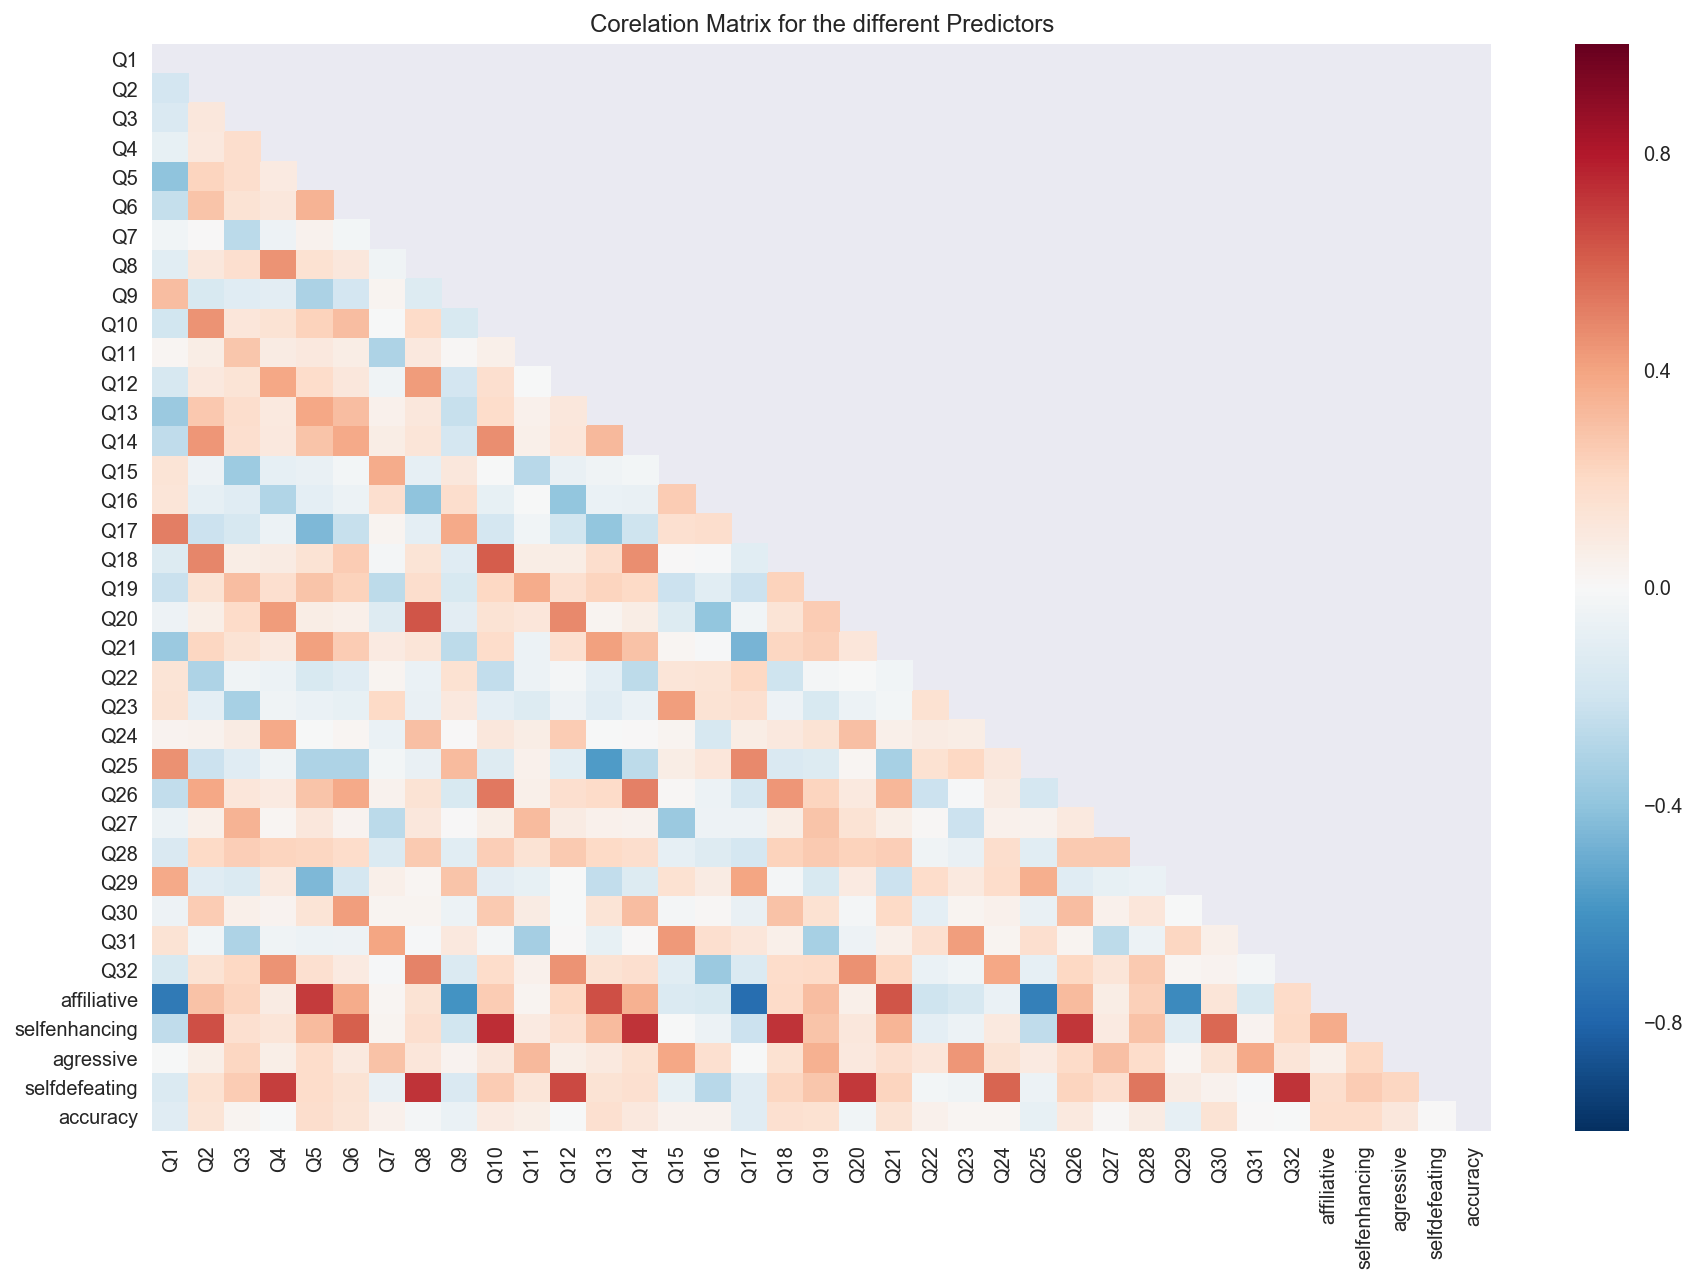

In [235]:
fig, ax = plt.subplots(figsize = (15,10))

hsq_corr = x_df.corr()

mask = np.zeros_like(hsq_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(hsq_corr, ax = ax, mask= mask)
plt.title('Corelation Matrix for the different Predictors')

In [236]:
'''We are going to use Standard Scaler for preprocessing'''

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_transform = ss.fit_transform(X)

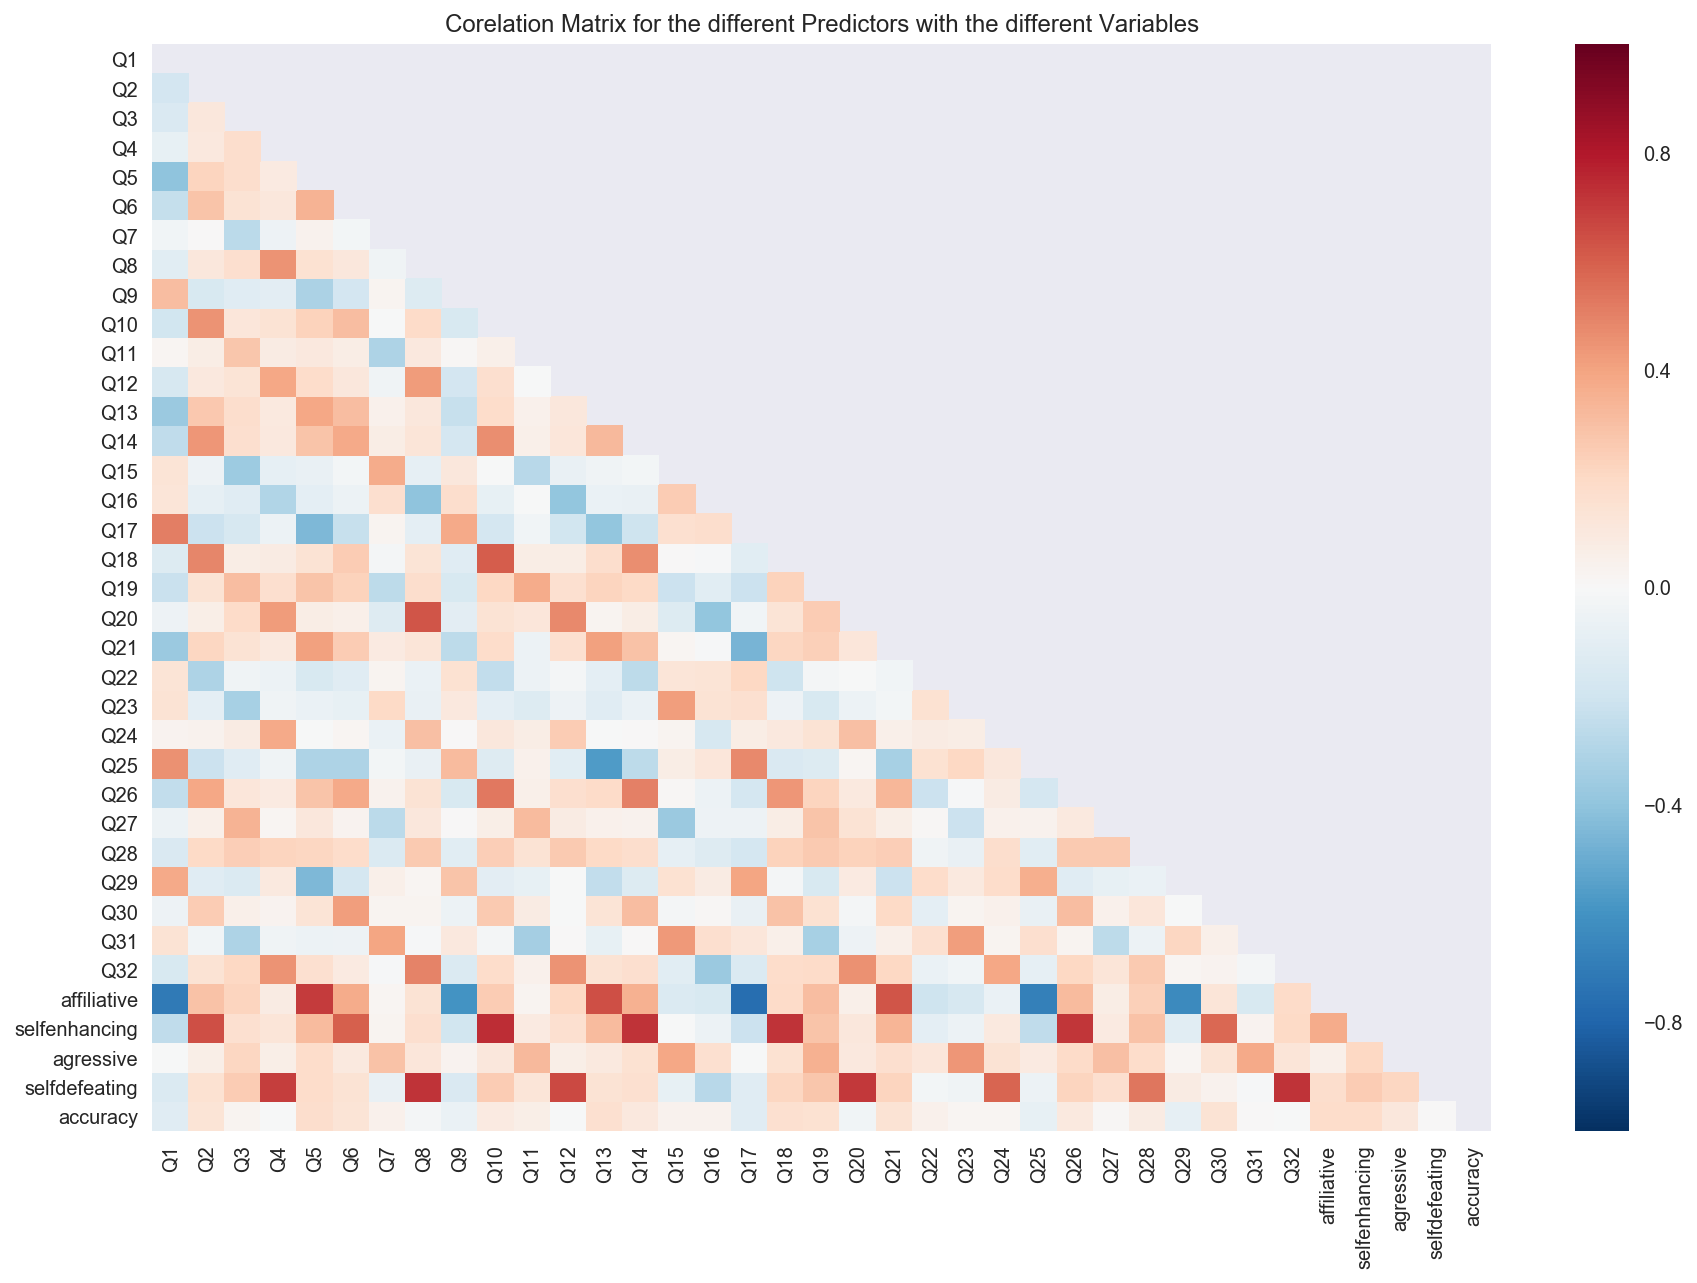

In [237]:
'''Plotting the Correlation Matrix for the Transformed and Standardized Predictors'''
X_transform_df = pd.DataFrame(X_transform, columns=columns)

fig, ax = plt.subplots(figsize = (15,10))

hsq_corr = X_transform_df.corr()

mask = np.zeros_like(hsq_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(hsq_corr, ax = ax, mask= mask)
plt.title('Corelation Matrix for the different Predictors with the different Variables')

We see that the both the standardized and the non-standardized heatmaps have a similar pattern.

### 3. Fit a Logistic Regression model and compare your cross-validated accuracy to the baseline.

In [238]:
'''Baseline Accuracy'''
baseline_accuracy = np.sum(hsq['gender'] == 1)/len(hsq)
print ('Baseline Accuracy of Finding a Male: ', baseline_accuracy)
print ('Baseline Accuracy of Finding a Female: ', 1 - baseline_accuracy)

Baseline Accuracy of Finding a Male:  0.548815165877
Baseline Accuracy of Finding a Female:  0.451184834123


In [239]:
'''Importing the Log Reg Module and Instantiating the Class'''
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [240]:
'''Performing the logred model to fit and transform the data'''
logreg_fit = logreg.fit(X_transform, y)
y_pred = logreg.predict(X_transform)

In [241]:
y_pred[0:10]

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 1])

In [242]:
y[0:10]

0    0
1    0
2    1
3    0
4    1
5    0
6    1
7    1
8    0
9    1
Name: gender, dtype: int64

In [243]:
'''Validating the Model using the Confusion Matrix'''
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
cm

array([[248, 228],
       [157, 422]])

In [244]:
prob = (cm[0][0]+ cm[1][1])/(cm[0][0]+ cm[0][1]+cm[1][0]+ cm[1][1])
print ('Model Performance: ', prob)

Model Performance:  0.635071090047


In [245]:
'''Evaluating model performance using Model Score'''
from sklearn.metrics import accuracy_score
print ('Model Performance using the Accuracy Score:', accuracy_score(y, y_pred))

Model Performance using the Accuracy Score: 0.635071090047


We see that the baseline accuracy without building a model of any sort, the probability of success was around 53%, now with a simple logistic regression model the probability of success has gone close to 64%. This is definitely an improvement.

### 4. Create a 50-50 train-test split. Fit the model on training and get the predictions and predicted probabilities on the test data.

In [246]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size = 0.5)

print ('X_Test Shape', X_test.shape)
print ('X_Train Shape', X_train.shape)
print ('y_Test Shape', y_test.shape)
print ('y_Train Shape', y_train.shape)

logreg = LogisticRegression()
logreg_train_fit = logreg.fit(X_train, y_train)
y_train_predict = logreg.predict(X_train)

X_Test Shape (528, 37)
X_Train Shape (527, 37)
y_Test Shape (528,)
y_Train Shape (527,)


In [247]:
'''Printing out the Predicted Y Values on the Training Data'''
y_train_predict[0:10]

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [248]:
'''Printing out the Actual Y Values from the Training Set'''
y_train[0:10]

828    1
524    1
812    1
0      0
77     1
236    0
841    0
264    1
863    0
28     0
Name: gender, dtype: int64

In [249]:
'''Predicting the Probablity Estimates'''
logreg.predict_proba(X_train)

array([[ 0.46162795,  0.53837205],
       [ 0.59779084,  0.40220916],
       [ 0.31991517,  0.68008483],
       ..., 
       [ 0.78298702,  0.21701298],
       [ 0.72126901,  0.27873099],
       [ 0.36315566,  0.63684434]])

In [250]:
'''Predicting the Test Values'''
y_test_predict = logreg.predict(X_test)

In [251]:
'''Printing out the Predicted Y Values on the Test Data'''
y_test_predict[0:10]

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [252]:
'''Printing out the Actual Y Values from the Test Set'''
y_test[0:10]

57      1
907     1
111     0
131     0
56      1
734     1
567     1
1019    0
5       0
923     1
Name: gender, dtype: int64

In [253]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_predict)
cm

array([[109, 130],
       [ 88, 201]])

In [254]:
prob = (cm[0][0]+ cm[1][1])/(cm[0][0]+ cm[0][1]+cm[1][0]+ cm[1][1])
print ('Model Performance on Test Data: ', prob)

Model Performance on Test Data:  0.587121212121


In [255]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_predict)
cm

array([[131, 106],
       [ 83, 207]])

In [256]:
prob = (cm[0][0]+ cm[1][1])/(cm[0][0]+ cm[0][1]+cm[1][0]+ cm[1][1])
print ('Model Performance on Train Data: ', prob)

Model Performance on Train Data:  0.641366223909


There is still work to be done for a couple of reasons
* The model fits the training data moderately well, however the fit on the test is not that good. Infact the fit on the test data is more or less the same as the baseline accuracy. There is no real benefit of the model in this case. 

### 5. Manually calculate the true positives, false positives, true negatives, and false negatives.

In [257]:
true_positive = np.sum((y_test==1) & (y_test_predict == 1))
true_positive

201

In [258]:
false_negative = np.sum((y_test==0) & (y_test_predict == 0))
false_negative

109

In [259]:
false_positive = np.sum((y_test==0) & (y_test_predict == 1))
false_positive

130

In [260]:
false_negative = np.sum((y_test==1) & (y_test_predict == 0))
false_negative 

88

### 6. Construct the confusion matrix. 

In [261]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_predict)
cm

array([[109, 130],
       [ 88, 201]])

### 7. Print out the false positive count as you change your threshold for predicting label 1.

In [294]:
'''Printing out the Probability'''
yhat_pp = logreg.predict_proba(X_test)

In [295]:
y_prob = pd.DataFrame(logreg.predict_proba(X_test), columns=['col_0_prob', 'col_1_prob'])
y_prob.head()

,col_0_prob,col_1_prob
0,0.473051,0.526949
1,0.197462,0.802538
2,0.596683,0.403317
3,0.591049,0.408951
4,0.599534,0.400466


In [296]:
y_test_predict[0:5]

array([1, 1, 0, 0, 0])

In [297]:
y_prob['col_lower_threshold_10'] = [1 if x >= 0.1 else 0 for x in y_prob.col_1_prob.values]

In [298]:
y_prob.head()

,col_0_prob,col_1_prob,col_lower_threshold_10
0,0.473051,0.526949,1
1,0.197462,0.802538,1
2,0.596683,0.403317,1
3,0.591049,0.408951,1
4,0.599534,0.400466,1


In [299]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_prob.col_lower_threshold_10)
cm

array([[  1, 238],
       [  0, 289]])

In [300]:
'''Evaluating model performance using Model Score'''
from sklearn.metrics import accuracy_score
print ('Model Performance using the Accuracy Score:', accuracy_score(y_test, y_prob.col_lower_threshold_10))

Model Performance using the Accuracy Score: 0.549242424242


### 8. Plot an ROC curve using your predicted probabilities on the test data.

Calculate the area under the curve.

> *Hint: go back to the lecture to find code for plotting the ROC curve.*

In [197]:
from sklearn.metrics import roc_curve, auc

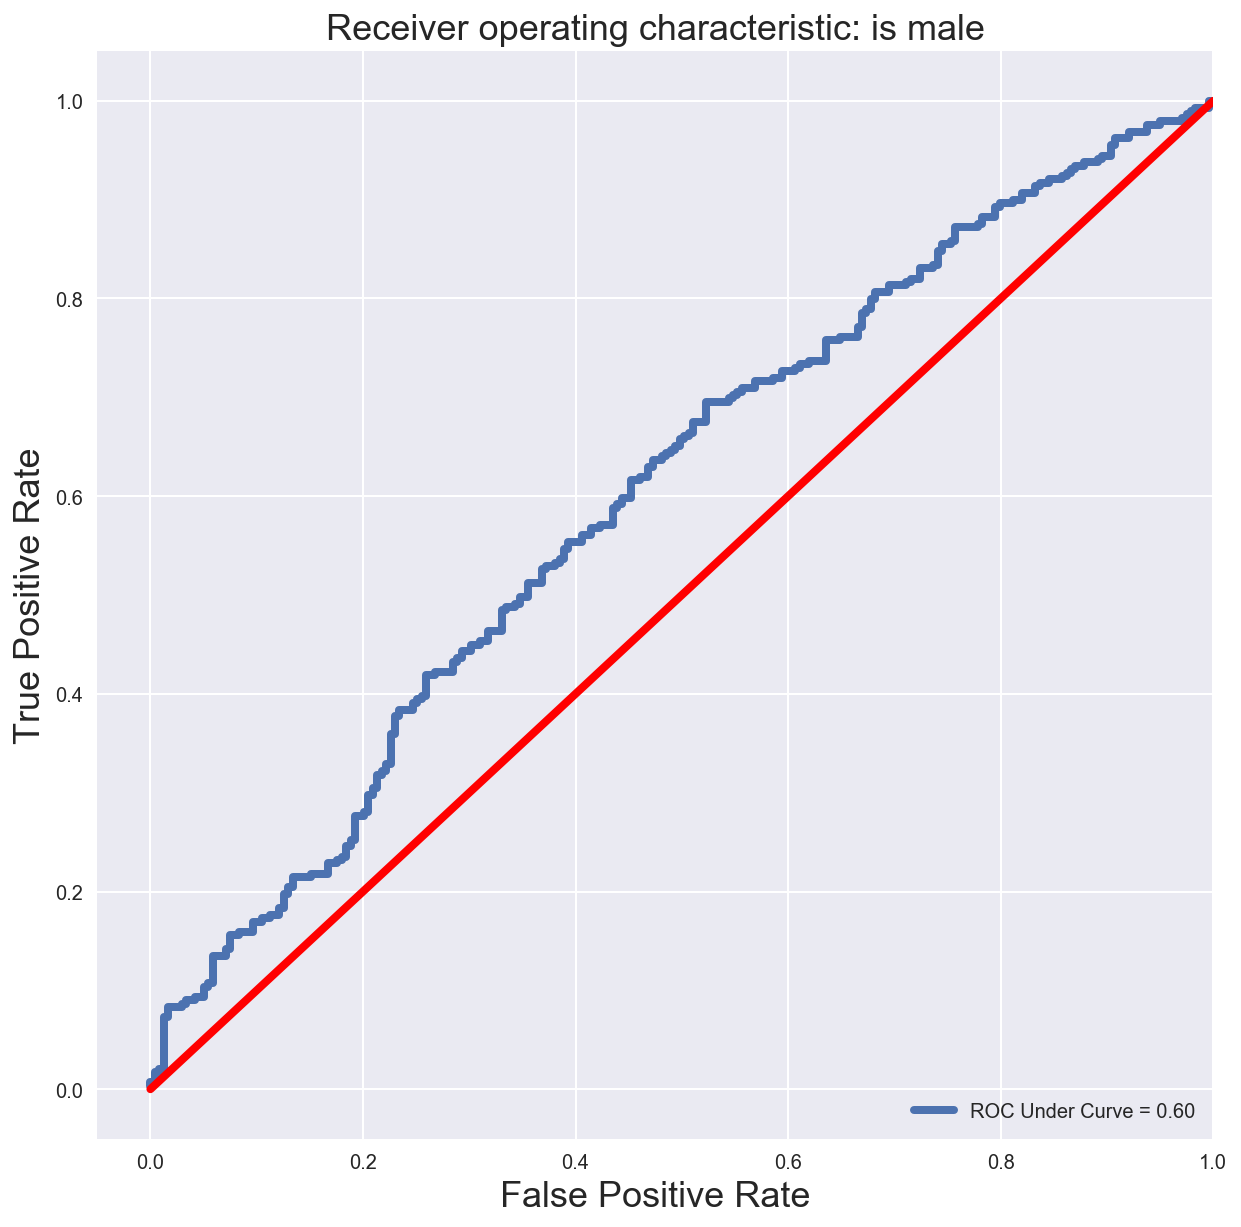

In [317]:
fpr, tpr , _ = roc_curve(y_test, yhat_pp[:,1])
roc_auc = auc(fpr,tpr)


plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, label='ROC Under Curve = %0.2f' %roc_auc, linewidth =4)
plt.plot([0,1], [0,1], linewidth=4,color ='red')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic: is male', fontsize=18)
plt.legend(loc="lower right")
plt.show()


### 9. Cross-validate a logistic regression with a Ridge penalty.

Logistic regression can also use the Ridge penalty. Sklearn's `LogisticRegressionCV` class will help you cross-validate an appropriate regularization strength.

**Important `LogisticRegressionCV` arguments:**
- `penalty`: this can be one of `'l1'` or `'l2'`. L1 is the Lasso, and L2 is the Ridge.
- `Cs`: How many different (automatically-selected) regularization strengths should be tested.
- `cv`: How many cross-validation folds should be used to test regularization strength.
- `solver`: When using the lasso penalty, this should be set to `'liblinear'`

> **Note:** The `C` regularization strength is the *inverse* of alpha. That is to say, `C = 1./alpha`

In [304]:
from sklearn.linear_model import LogisticRegressionCV

In [309]:
logregcv = LogisticRegressionCV(Cs=10, penalty='l2', cv=25)
logregcv_fit = logregcv.fit(X_train, y_train)

**9.B Calculate the predicted labels and predicted probabilities on the test set with the Ridge logisitic regression.**

In [311]:
y_test_predict_logreg = logregcv_fit.predict(X_test)
y_logreg_pp = logregcv_fit.predict_proba(X_test)

**9.C Construct the confusion matrix for the Ridge LR.**

In [312]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_predict_logreg)
cm

array([[ 90, 149],
       [ 75, 214]])

In [313]:
print ('Model Score: ', accuracy_score(y_test, y_test_predict_logreg))

Model Score:  0.575757575758


### 10. Plot the ROC curve for the original and Ridge logistic regressions on the same plot.

Which performs better?

In [314]:
fpr_ridge, tpr_ridge, _ = roc_curve(y_test, y_logreg_pp[:,1])

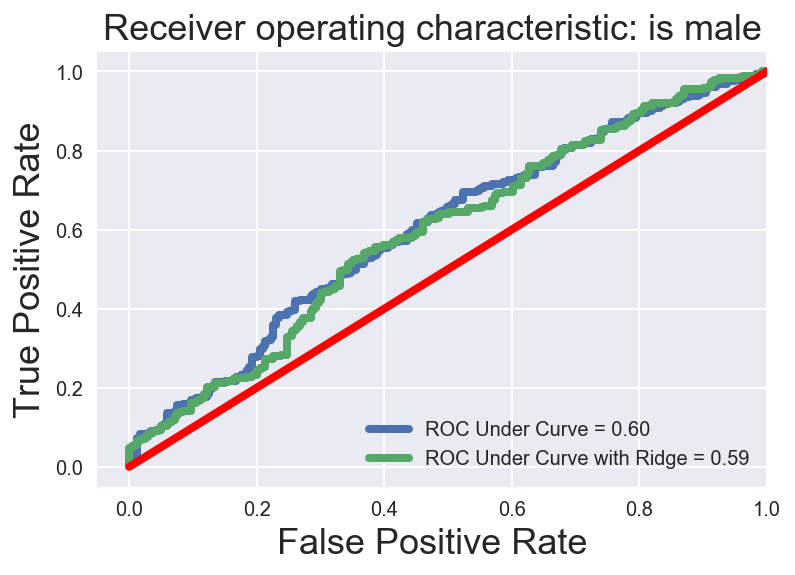

In [320]:
roc_auc_ridge = auc(fpr_ridge, tpr_ridge)
plt.plot(fpr, tpr, label='ROC Under Curve = %0.2f' %roc_auc, linewidth =4)
plt.plot(fpr_ridge, tpr_ridge, label='ROC Under Curve with Ridge = %0.2f' %roc_auc_ridge, linewidth =4)
plt.plot([0, 1], [0, 1], linewidth=4, color='red')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic: is male', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### 11. Cross-validate a Lasso logistic regression.

**Remember:**
- `penalty` must be set to `'l1'`
- `solver` must be set to `'liblinear'`

> **Note:** The lasso penalty can be considerably slower. You may want to try fewer Cs or use fewer cv folds.

In [322]:
lr_lasso = LogisticRegressionCV(penalty='l1', solver='liblinear', Cs=100, cv=10)
lr_lasso_fit = lr_lasso.fit(X_train, y_train)

In [323]:
y_test_predict_lasso = lr_lasso_fit.predict(X_test)
y_lasso_pp = lr_lasso_fit.predict_proba(X_test)

### 12. Make the confusion matrix for the Lasso model.

In [324]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_predict_lasso)
cm

array([[109, 130],
       [ 89, 200]])

In [326]:
print ('Model Score: ', accuracy_score(y_test, y_test_predict_lasso))

Model Score:  0.585227272727


### 13. Plot all three logistic regression models on the same ROC plot.

Which is the best? (if any)

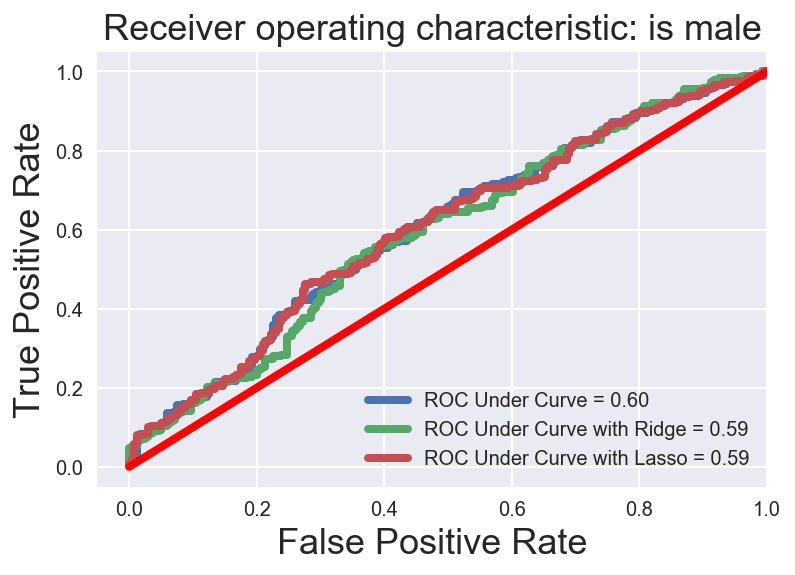

In [330]:
fpr_lasso, tpr_lasso, _ = roc_curve(y_test,y_lasso_pp[:,1])
roc_auc_lasso = auc(fpr_lasso, tpr_lasso)


plt.plot(fpr, tpr, label='ROC Under Curve = %0.2f' %roc_auc, linewidth =4)
plt.plot(fpr_ridge, tpr_ridge, label='ROC Under Curve with Ridge = %0.2f' %roc_auc_ridge, linewidth =4)
plt.plot(fpr_lasso, tpr_lasso, label='ROC Under Curve with Lasso = %0.2f' %roc_auc_ridge, linewidth =4)



plt.plot([0, 1], [0, 1], linewidth=4, color='red')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic: is male', fontsize=18)
plt.legend(loc="lower right")
plt.show()




### 14. Look at the coefficients for the Lasso logistic regression model. Which variables are the most important?

In [331]:
lr_lasso.coef_

array([[ 0.00683272, -0.06079032, -0.0066529 ,  0.06317978,  0.15186254,
        -0.02196366, -0.11618976, -0.00752057,  0.14110098, -0.17892412,
         0.25722758,  0.14126708,  0.08319528,  0.04942633, -0.31416498,
        -0.03619152,  0.        ,  0.        ,  0.        ,  0.17991441,
         0.        , -0.00523155,  0.14977241,  0.1413924 ,  0.09106586,
         0.16952816,  0.        , -0.2206425 , -0.00953025, -0.07128201,
        -0.04036739,  0.13122051,  0.        ,  0.        , -0.19423071,
         0.        ,  0.16439122]])

In [336]:
coefficients = pd.DataFrame({
    'Coeff': lr_lasso.coef_[0], 
    'Abs Coeff': np.abs(lr_lasso.coef_[0]),
    'X': X.columns 
})

In [340]:
coefficients.head()

,Abs Coeff,Coeff,X
0,0.006833,0.006833,Q1
1,0.060790,-0.060790,Q2
2,0.006653,-0.006653,Q3
3,0.063180,0.063180,Q4
4,0.151863,0.151863,Q5


In [341]:
coefficients.sort_values(by='Abs Coeff', ascending=False)

,Abs Coeff,Coeff,X
14,0.314165,-0.314165,Q15
10,0.257228,0.257228,Q11
27,0.220642,-0.220642,Q28
34,0.194231,-0.194231,agressive
19,0.179914,0.179914,Q20
9,0.178924,-0.178924,Q10
25,0.169528,0.169528,Q26
36,0.164391,0.164391,accuracy
4,0.151863,0.151863,Q5
22,0.149772,0.149772,Q23
